## DBSCAN
## Alaa Elsayed Mohamed Desukey

In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

from matplotlib import cm
from colorspacious import cspace_converter

from sklearn.datasets import make_blobs

%matplotlib inline

# DBSCAN with Multiple Data Sets

Read [here](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf) if math excites you.

## Dataset 1

In [10]:
d1 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM1.csv")

d1.head()



,x,y
0,1.206087,1.847686
1,0.351919,0.245691
2,1.201688,0.630774
3,0.733710,1.364328
4,1.150745,0.724892


In [11]:
# dbscan 
cluster = DBSCAN(eps=.3, min_samples=10).fit(d1)
label1 = cluster.labels_
label1

array([-1,  0,  0,  0,  0,  0,  1,  0, -1,  0,  1, -1, -1,  0,  0,  0,  0,
        2, -1,  1,  0, -1,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  1,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  1,  0, -1,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  1,  0,  0, -1, -1,  0,  0, -1, -1,  0, -1,  2,
        3, -1,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  3,  2,
        2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  3,  2,  3,  2,  2,  2,  2,
        3,  2,  2,  2,  2,  3,  3,  3,  2, -1, -1,  2,  2,  2,  2,  2,  2,
        2,  3,  2,  2,  2,  2,  2,  3,  3,  2, -1,  2,  3, -1,  2, -1,  2,
       -1,  2,  2,  2,  2,  3,  2,  2,  3, -1, -1, -1,  2, -1,  2,  2, -1,
        2, -1,  2,  2,  2,  2, -1,  2,  2,  2,  3,  2, -1], dtype=int64)

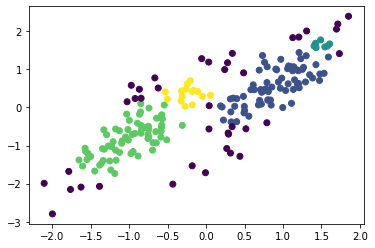

In [12]:
#plot data 
plt.scatter(d1['x'], d1['y'], c=label1, cmap='viridis') 
plt.show() 

In [13]:
# grab only clustered data points
cluster_num = len(set(label1))-1
noise_num = list(label1).count(-1)

print('clusters number are -> %d ' %cluster_num)
print('noise numbers are   -> %d'  %noise_num)

clusters number are -> 4 
noise numbers are   -> 39


In [14]:
# overall 
# overall 
import sklearn.metrics as metrics
print("Silhouette Coefficient: %f" % metrics.silhouette_score(d1, label1))


Silhouette Coefficient: 0.182682


## Dataset 2

In [15]:
d2 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")
d2


,x,y
0,1.578527,1.408111
1,1.748206,0.441915
2,1.523151,0.681521
3,1.318949,0.362971
4,0.977164,-0.373589
...,...,...
295,-0.522015,1.682249
296,-0.195039,1.177602
297,0.004994,1.111269
298,-1.954443,0.506557


In [16]:
cluster2 = DBSCAN(eps=.3, min_samples=10).fit(d2)
label2 = cluster2.labels_
label2

array([-1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,
       -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0, -1,  0,  0, -1,  0,  0,
        0,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0, -1, -1,
        0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,  0,  0,
       -1,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  1,  1,
        1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1, -1, -1,  1,
        1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1, -1,
        1, -1,  1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,
        1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
       -1, -1, -1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  2, -1,  2,  2,
        2,  2,  2,  2, -1, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
       -1,  2,  2,  2,  2

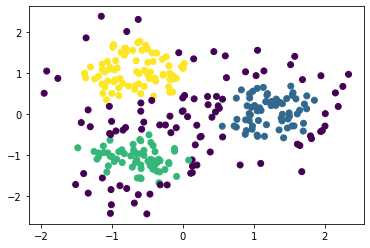

In [17]:
#plot data 
plt.scatter(d2['x'], d2['y'], c=label2, cmap='viridis') 
plt.show() 

In [18]:
# grab only clustered data points
cluster_num2 = len(set(label2))-1
noise_num2 = list(label2).count(-1)

print('clusters number are -> %d ' %cluster_num2)
print('noise numbers are   -> %d'  %noise_num2)


# overall 
import sklearn.metrics as metrics
print("Silhouette Coefficient: %f" %metrics.silhouette_score(d2, label2))

clusters number are -> 3 
noise numbers are   -> 95
Silhouette Coefficient: 0.317035


## Dataset 3

In [19]:
d3 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM3.csv")

d3

,x,y
0,1.332228,0.178299
1,1.256056,0.146765
2,1.477661,0.155054
3,1.384840,0.022054
4,1.526956,0.267920
...,...,...
295,-0.781903,1.349355
296,-0.607142,1.395445
297,-0.697949,0.998947
298,-0.763402,1.166268


In [20]:
cluster3 = DBSCAN(eps=.3, min_samples=10).fit(d3)
label3 = cluster3.labels_
label3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

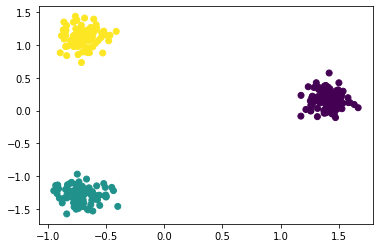

In [21]:
#plot data 
plt.scatter(d3['x'], d3['y'], c=label3, cmap='viridis') 
plt.show() 

In [22]:
# grab only clustered data points
cluster_num3 = len(set(label3))
noise_num3 = list(label3).count(-1)

print('clusters number are -> %d ' %cluster_num3)
print('noise numbers are   -> %d'  %noise_num3)


# overall 
import sklearn.metrics as metrics
print("Silhouette Coefficient: %f" %metrics.silhouette_score(d3,label3))

clusters number are -> 3 
noise numbers are   -> 0
Silhouette Coefficient: 0.913619


## Dataset 4

In [23]:
d4 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM4.csv")
d4

,x,y
0,-0.006848,0.395527
1,0.314820,-0.289261
2,0.171705,1.078077
3,-1.203661,1.325926
4,-0.179379,-0.036615
...,...,...
595,4.189792,1.915447
596,-4.249038,-2.317456
597,3.411690,2.726428
598,3.629434,-2.392112


In [24]:
cluster4 = DBSCAN(eps=.5, min_samples=8).fit(d4)
label4 = cluster4.labels_
label4

array([ 0,  0,  0, -1,  0,  0, -1,  0,  0,  0, -1, -1, -1, -1,  0,  0,  0,
        0,  0,  0, -1,  0, -1,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0, -1,  0,  1,  1,
        1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  2,  1,  2,  3,  1,  1,  3,
        3,  1,  1,  3,  1,  1,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,
        2,  1,  1,  1,  1,  1,  1,  3,  3,  1,  1,  1,  1,  1,  3,  1,  1,
        1,  4,  3,  1,  3,  1,  2,  1,  1,  1,  1,  2,  1,  1,  2,  2,  1,
       -1,  4,  1,  2,  1,  1,  2,  3,  1,  3,  1,  1,  1,  3,  1,  1,  1,
        1,  1,  1,  1,  1,  2,  4,  1,  1,  1,  1,  3,  1,  1,  1,  1,  2,
        1,  1,  3,  1,  1,  2,  1,  2,  2,  4,  1,  1,  3,  2,  1,  1,  1,
        2,  1,  3,  1,  1

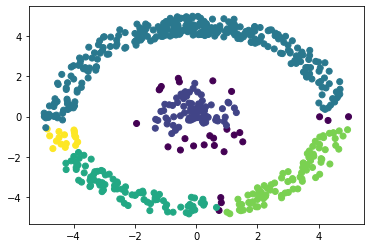

In [25]:
#plot data 
plt.scatter(d4['x'], d4['y'], c=label4, cmap='viridis') 
plt.show() 

In [26]:
# grab only clustered data points
cluster_num4 = len(set(label4))-1
noise_num4 = list(label4).count(-1)

print('clusters number are -> %d ' %cluster_num4)
print('noise numbers are   -> %d'  %noise_num4)


# overall 
import sklearn.metrics as metrics
print("Silhouette Coefficient: %f" %metrics.silhouette_score(d4,label4))

clusters number are -> 5 
noise numbers are   -> 27
Silhouette Coefficient: 0.249226


### Compare

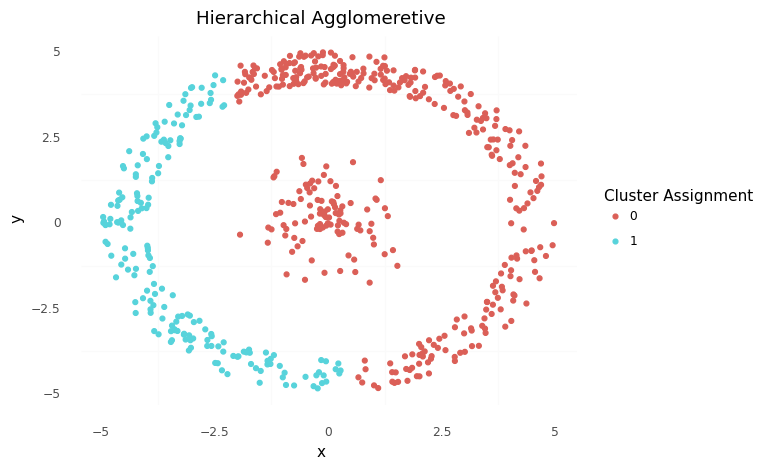

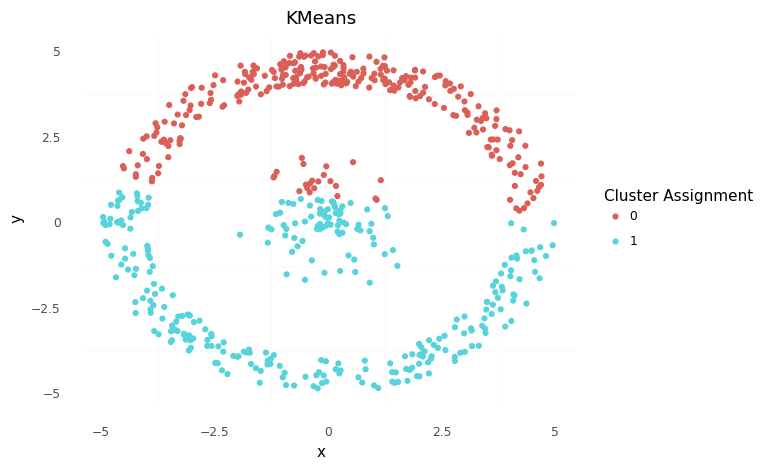

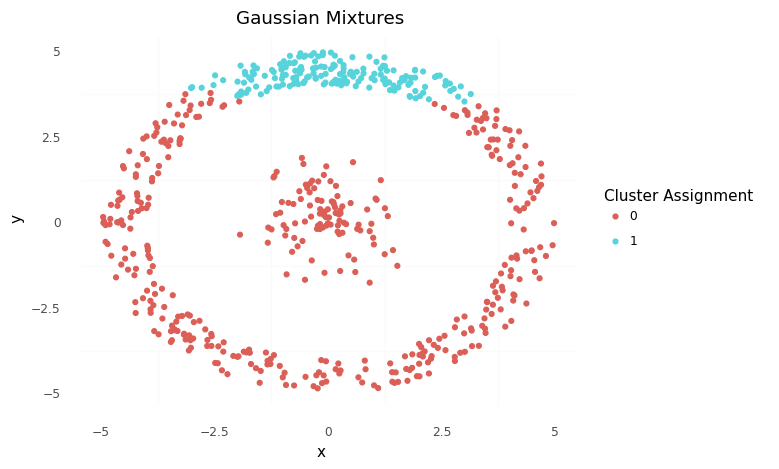

In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

hac = AgglomerativeClustering(2)
km = KMeans(2)
gm = GaussianMixture(2)

hac.fit(d4[["x","y"]])
km.fit(d4[["x","y"]])
gm.fit(d4[["x","y"]])

d4["hac"] = hac.labels_
d4["km"] = km.labels_
d4["gm"] = gm.predict(d4[["x","y"]])


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d4, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))

## Dataset 5

In [28]:
d5 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM5.csv")
d5

,x,y
0,2.852449,-0.324568
1,2.346342,-0.729224
2,2.229033,-0.599340
3,2.458669,-0.385467
4,2.844177,-0.196813
...,...,...
445,0.053959,0.314733
446,0.498435,0.833252
447,0.631066,0.446481
448,-0.730062,0.917065


In [29]:
db5 = DBSCAN(eps = 0.5, min_samples = 15).fit(d5)
label5 = db5.labels_

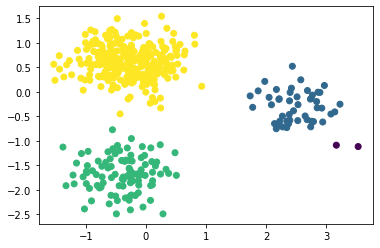

In [30]:
#plot data 
plt.scatter(d5['x'], d5['y'], c=label5, cmap='viridis') 
plt.show() 

In [31]:
# grab only clustered data points
cluster_num5 = len(set(label5))-1
noise_num5 = list(label5).count(-1)

print('clusters number are -> %d ' %cluster_num5)
print('noise numbers are   -> %d'  %noise_num5)


# overall 
import sklearn.metrics as metrics
print("Silhouette Coefficient: %f" %metrics.silhouette_score(d5,label5))

clusters number are -> 3 
noise numbers are   -> 2
Silhouette Coefficient: 0.671411


# Elbow Method

Read more [here](https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf) if math excites you.

## Dataset 6

In [32]:
d6 = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM6.csv")
d6

,x,y
0,0.712520,0.653491
1,0.910914,0.068242
2,0.750752,0.526512
3,0.666605,0.584747
4,0.403062,0.956459
...,...,...
295,-0.530407,1.218364
296,-1.096856,-1.173641
297,-0.805383,-0.112308
298,-1.849885,1.529973


## select the optimal Epsilon

In [33]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(d6)
distances, indices = nbrs.kneighbors(d6)

In [34]:
# sort the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]

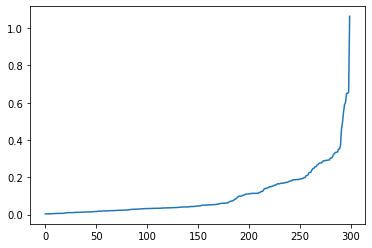

In [35]:
#plot the distances

plt.plot(distances)

In [36]:
# we ask for 4 nearest, because the data point it self (distance = 0) is included
hac = AgglomerativeClustering(3)
km = KMeans(3)
gm = GaussianMixture(3)
db = DBSCAN(eps=0.5, min_samples=10)

hac.fit(d6)
km.fit(d6)
gm.fit(d6)
db.fit(d6)

d6["hac"] = hac.labels_
d6["km"]  = km.labels_
d6["gm"]  = gm.predict(d6[["x","y"]])
d6["db"]  = db.labels_

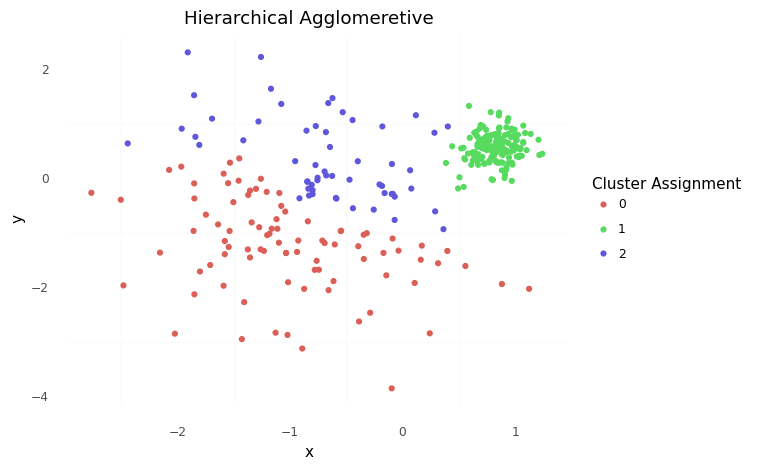

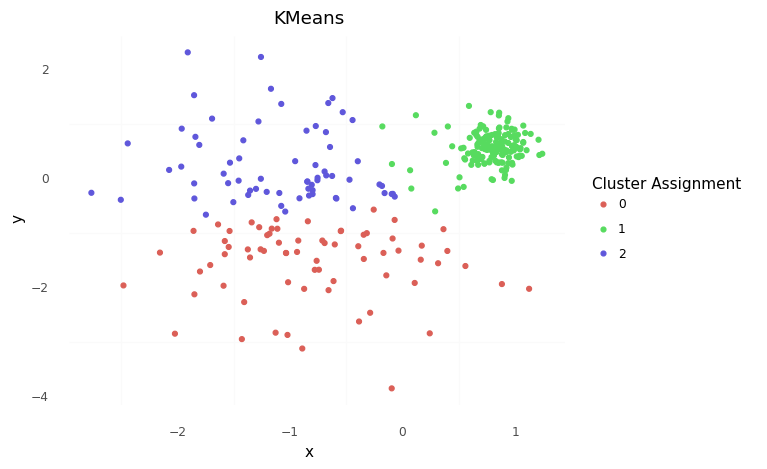

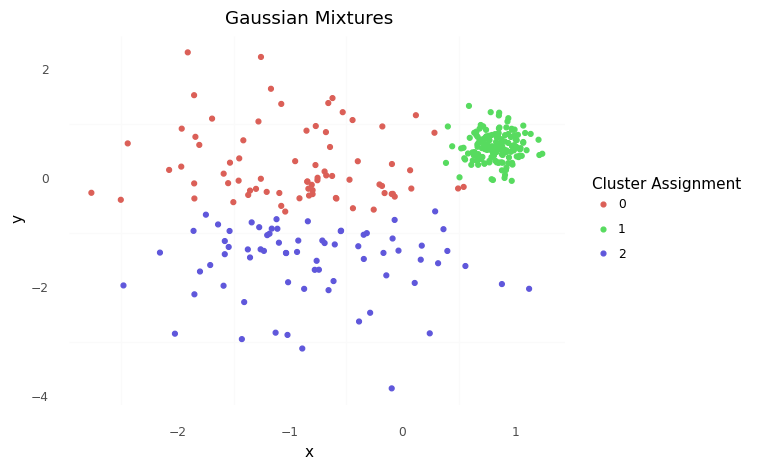

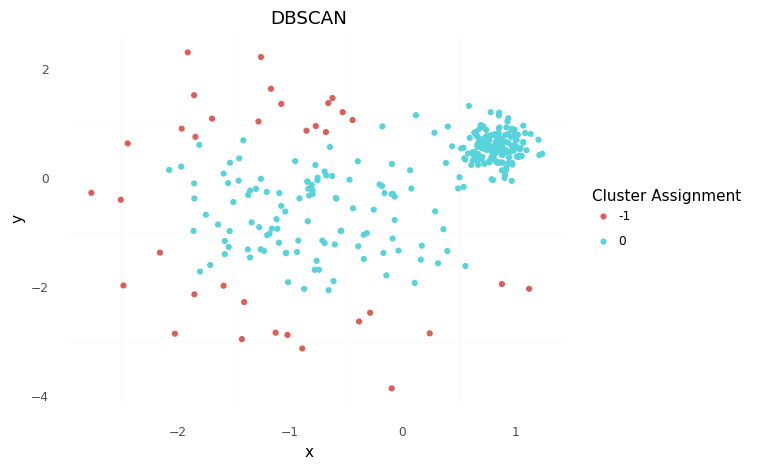

In [37]:
print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(hac)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Hierarchical Agglomeretive"))


print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(km)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "KMeans"))


print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(gm)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "Gaussian Mixtures"))
print(ggplot(d6, aes(x = "x", y = "y",
                    color = "factor(db)")) +
             geom_point() +
             theme_minimal() +
             scale_color_discrete(name = "Cluster Assignment") +
             theme(panel_grid_major = element_blank()) + 
             labs(title = "DBSCAN"))

In [41]:
# overall
print("Silhouette Coefficient Hierarchical: %0.3f" % metrics.silhouette_score(d6, d6["hac"]))
print("Silhouette Coefficient KMeans:       %0.3f "% metrics.silhouette_score(d6, d6["km"]))
print("Silhouette Coefficient(Gaussian ):   %0.3f "% metrics.silhouette_score(d6, d6["gm"]))
print("Silhouette Coefficient(DBSCAN):      %0.3f "% metrics.silhouette_score(d6, d6["db"]))

Silhouette Coefficient Hierarchical: 0.598
Silhouette Coefficient KMeans:       0.648 
Silhouette Coefficient(Gaussian ):   0.641 
Silhouette Coefficient(DBSCAN):      0.397 
